# <font color='green'> <b>Exploratory Data Analysis</b><font color='black'>

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

**Attribute Information:**

**Age**: Describes the age of individuals. Continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: Continuous.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: Number of years spent in education. Continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: Bir bireyin varlık satışlarından (örneğin, hisse senedi veya gayrimenkul satışı) elde ettiği kazancı temsil eder. Continuous.

**capital-loss**: Bir bireyin varlık satışlarından (örneğin, hisse senedi veya gayrimenkul satışı) uğradığı zararı temsil eder. Continuous.

**hours-per-week**: Continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary**: >50K,<=50K.


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

plt.rcParams["figure.figsize"] = (10, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [120]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 32561 entries, 0 to 32560

Data columns (total 15 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   age             32561 non-null  int64 

 1   workclass       32561 non-null  object

 2   fnlwgt          32561 non-null  int64 

 3   education       32561 non-null  object

 4   education.num   32561 non-null  int64 

 5   marital.status  32561 non-null  object

 6   occupation      32561 non-null  object

 7   relationship    32561 non-null  object

 8   race            32561 non-null  object

 9   sex             32561 non-null  object

 10  capital.gain    32561 non-null  int64 

 11  capital.loss    32561 non-null  int64 

 12  hours.per.week  32561 non-null  int64 

 13  native.country  32561 non-null  object

 14  income          32561 non-null  object

dtypes: int64(6), object(9)

memory usage: 3.7+ MB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [123]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [124]:
# Checks for duplicate observations in the dataset and removes them if found

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep="first").sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep="first", inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [125]:
heading = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]
df = pd.read_csv("adult.csv",
                 header=None,
                 names=heading,
                 na_values=[" ?","?"],
                 skipinitialspace=True)
print(df.shape)
df.head()

(32562, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [126]:
# Removes rows where the value in each column matches the column name

for column in df.columns:
    df = df[df[column] != column]

In [127]:
# Capitalizes the first letter of each column name

df.columns = df.columns.str.capitalize()

In [128]:
# Replaces '-' with '_' in the column names

df.columns = df.columns.str.replace("-", "_")

In [129]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<Axes: >

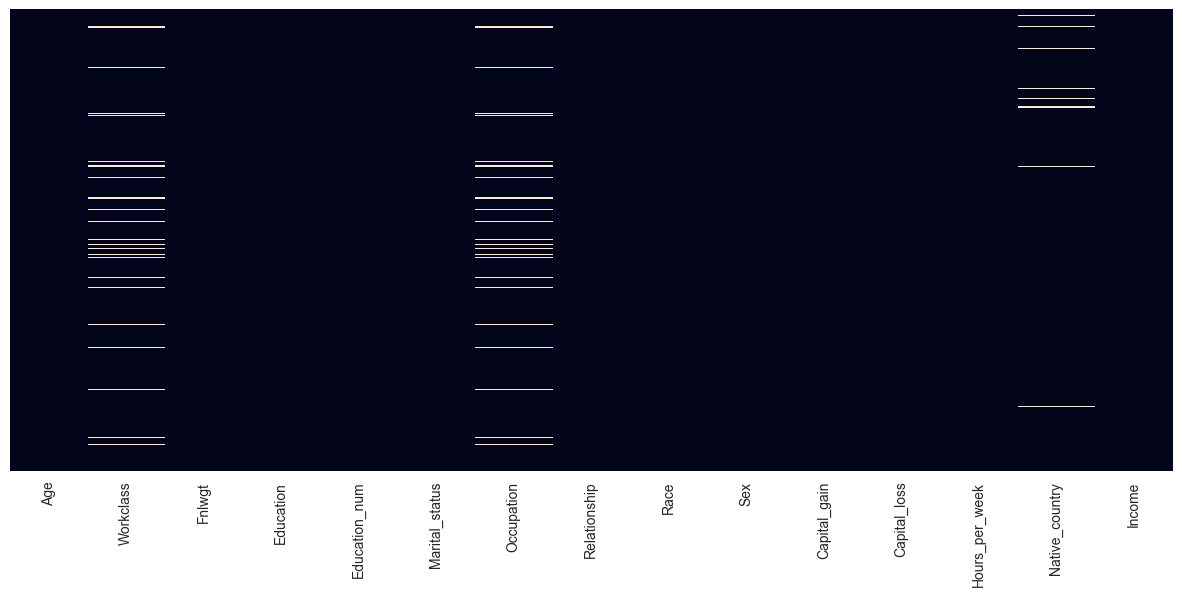

In [130]:
# checking for missing values in data

plt.figure(figsize = (15,6))
sns.heatmap(df.isnull(),yticklabels = False , cbar = False)

In [131]:
#cleaning string in integer columns
for i in df.columns:
    if df[i].dtype == "int64":
        df[i] = df[i].astype(str).str.strip().astype(int)

In [132]:
# Converts the columns to integer data type

df["Education_num"] = df["Education_num"].astype(int)
df["Capital_gain"] = df["Capital_gain"].astype(int)
df["Capital_loss"] = df["Capital_loss"].astype(int)
df["Hours_per_week"] = df["Hours_per_week"].astype(int)

In [133]:
df.select_dtypes(exclude=["object"])

,Education_num,Capital_gain,Capital_loss,Hours_per_week
1,9,0,4356,40
2,9,0,4356,18
3,10,0,4356,40
4,4,0,3900,40
5,10,0,3900,40
...,...,...,...,...
32557,10,0,0,40
32558,12,0,0,38
32559,9,0,0,40
32560,9,0,0,40


In [134]:
df.select_dtypes(exclude=["int"])

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
1,90,NaN,77053,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K
2,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,66,NaN,186061,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K
4,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
5,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32557,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32558,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32559,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32560,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


## Age

In [135]:
df["Age"] = df["Age"].astype(int)

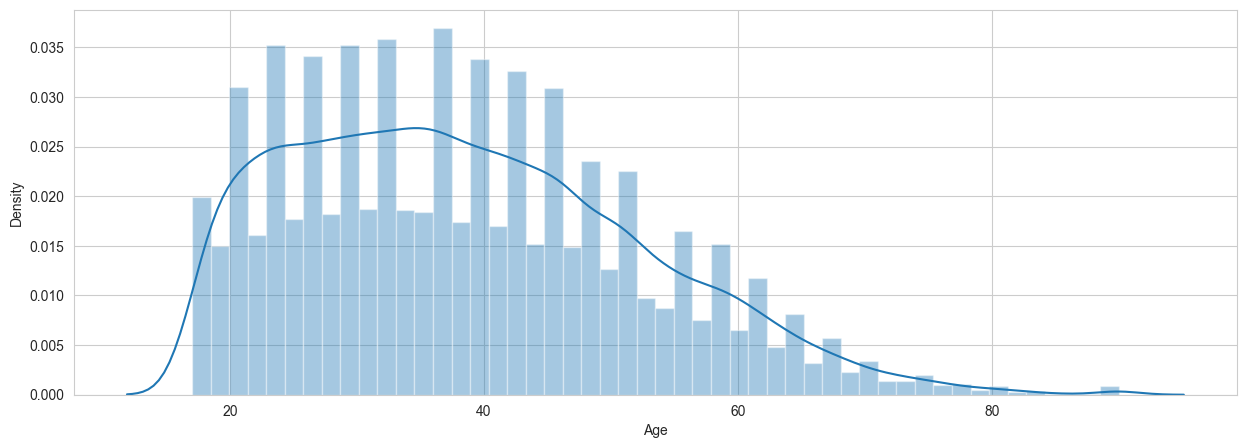

____________________________________________________________________________________________________

skewness in age column : 0.5587433694130483


In [136]:
# Doing univariate analysis on age column
plt.figure(figsize = (15,5))
sns.distplot(df["Age"], kde = True)
plt.show()
print("_"*100)
print("skewness in age column :",df["Age"].skew())

In [137]:
# Removing outliers from age column
Age_mean = df["Age"].mean()
Age_std = df["Age"].std()

upper_bound = Age_mean + 3*Age_std
lower_bound = Age_mean - 3*Age_std

df = df[(df["Age"] <= upper_bound) & (df["Age"] >= lower_bound)]

## Hours per week

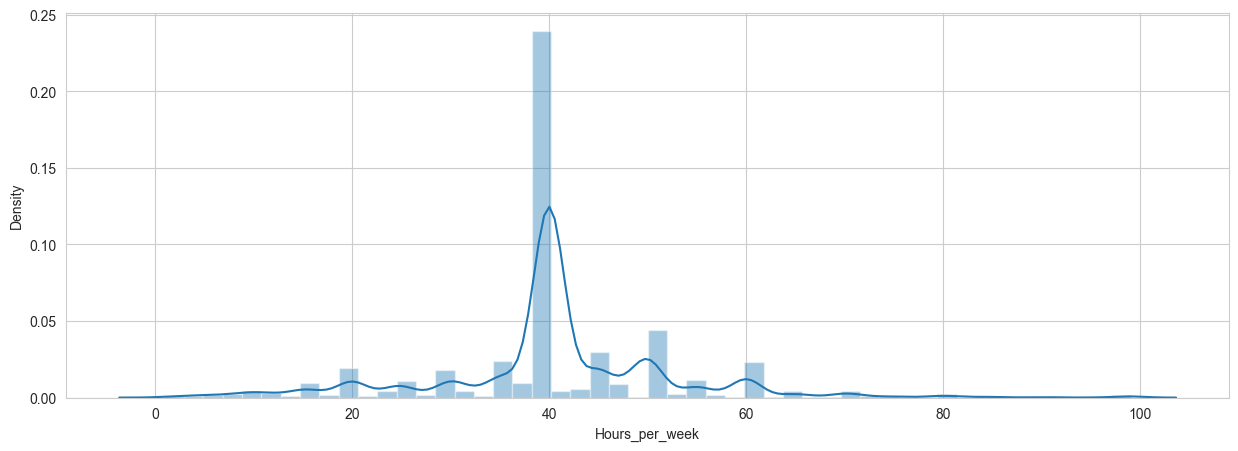

____________________________________________________________________________________________________

skewness in age column : 0.23826822198405706


In [138]:
# Doing univariate analysis on workours column
plt.figure(figsize = (15,5))
sns.distplot(df["Hours_per_week"], kde = True)
plt.show()
print("_"*100)
print("skewness in age column :",df["Hours_per_week"].skew())

In [139]:
df = df[~((df["Hours_per_week"] > 72) | (df["Hours_per_week"] < 20))]

## Marital Status

In [140]:
df["Marital_status"].value_counts()

Marital_status
Married-civ-spouse       14220
Never-married             9673
Divorced                  4261
Separated                  982
Widowed                    796
Married-spouse-absent      396
Married-AF-spouse           18
Name: count, dtype: int64

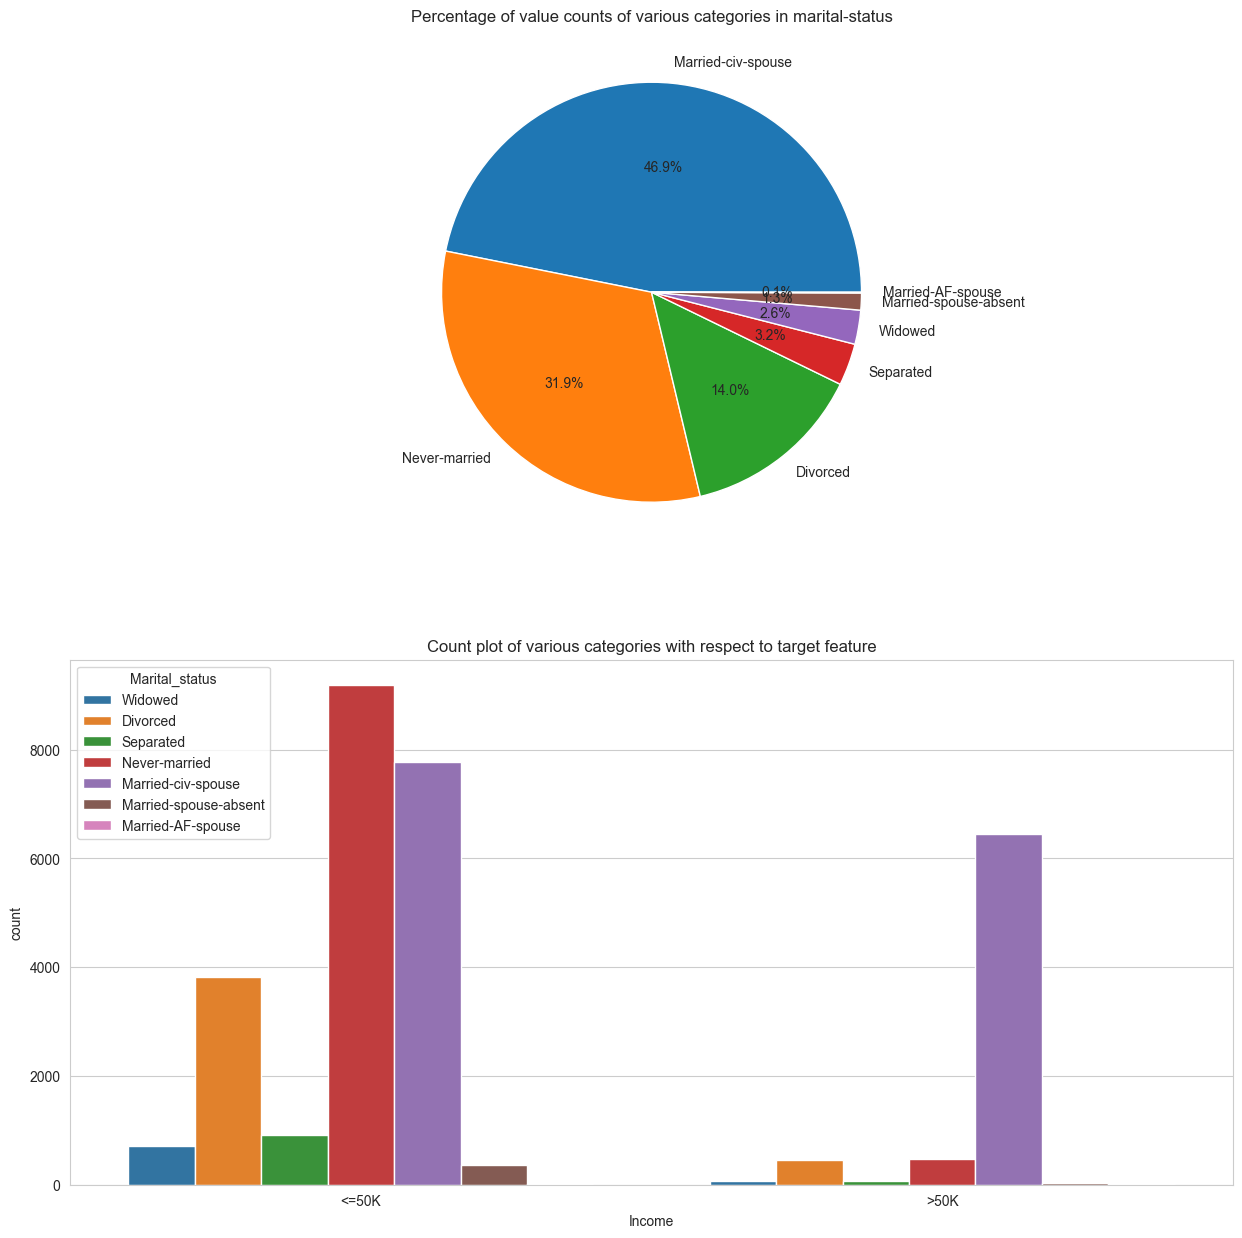

In [141]:
#From the graphs above, we observe that the category marred-civ-spouse have a greater probability of earning greater then 50K per annum.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
ax1 = axes[0]
ax2 = axes[1]
sns.countplot(x="Income", hue="Marital_status", data=df, ax=ax2)
ax2.set_title(
    "Count plot of various categories with respect to target feature")
ax1.pie(x = df["Marital_status"].value_counts(normalize=True), labels = df["Marital_status"].value_counts().index,\
       autopct="%1.1f%%", radius = 1)
ax1.set_title(
    "Percentage of value counts of various categories in marital-status")
plt.show()

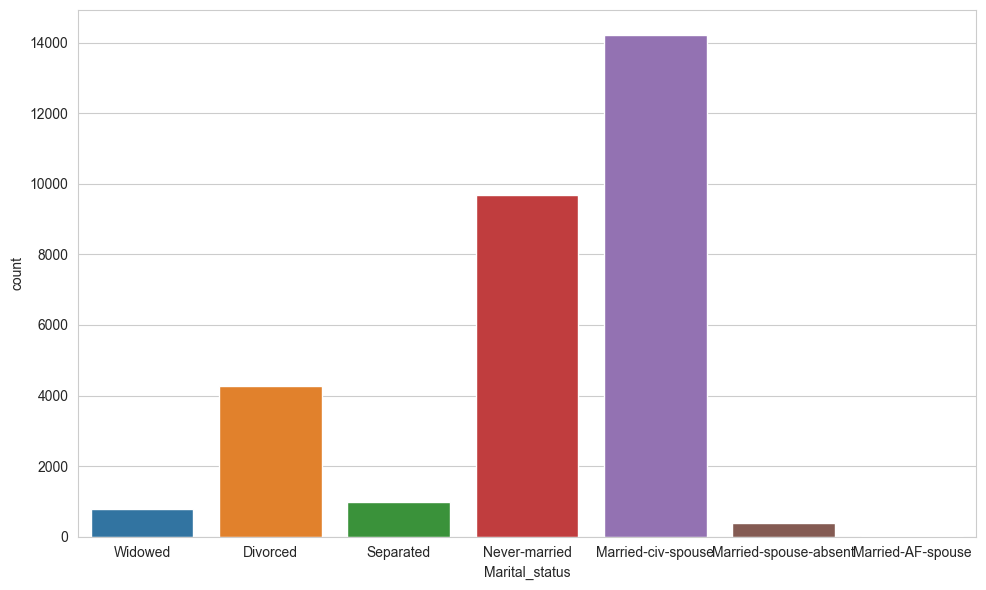

In [142]:
# Creating a plot
fig = plt.figure(figsize=(10, 6))

# Using the correct DataFrame
sns.countplot(x="Marital_status", data=df)

plt.tight_layout()
plt.show()

In [143]:
df["Marital_status"] = df["Marital_status"].replace({
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Married-AF-spouse": "Married"
})

## Income

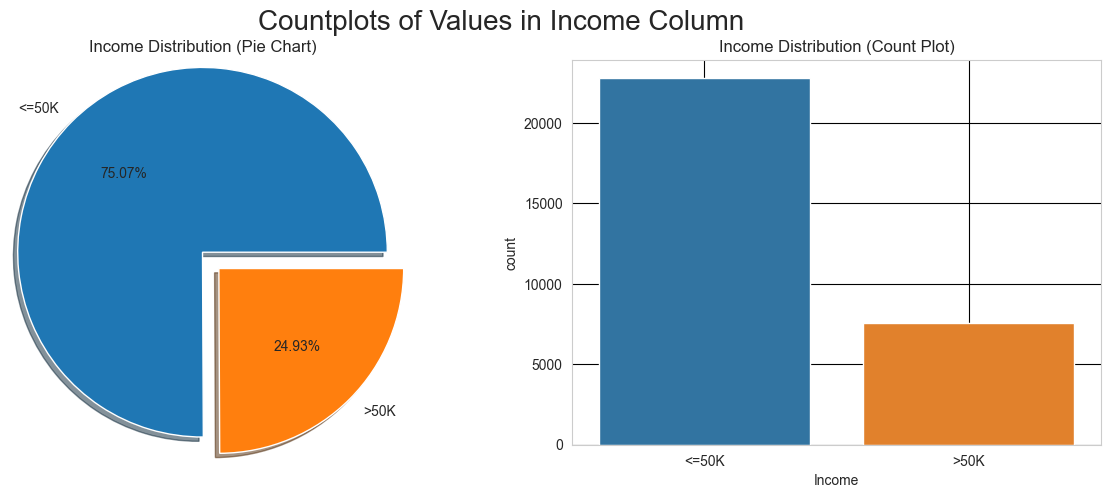

In [144]:
# Plots for balance check
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1, ax2 = axes

# Pie chart
ax1.pie(df["Income"].value_counts(normalize=True), 
        explode=[0, 0.15], 
        autopct="%1.2f%%", 
        labels=['<=50K', '>50K'], 
        radius=1.2, 
        shadow=True)
ax1.set_title("Income Distribution (Pie Chart)")

# Bar plot
sns.set_style(style="dark")
sns.countplot(x="Income", data=df, ax=ax2)
ax2.set_title("Income Distribution (Count Plot)")
ax2.grid(True, color="black")

# Overall title
fig.suptitle("Countplots of Values in Income Column", fontsize=20)

plt.show()

In [145]:
# Parcentage of <=50k values

print((24720/(24720+7841))*100)
(7841/(24720+7841))*100

75.91904425539757


24.080955744602438

## Workclass

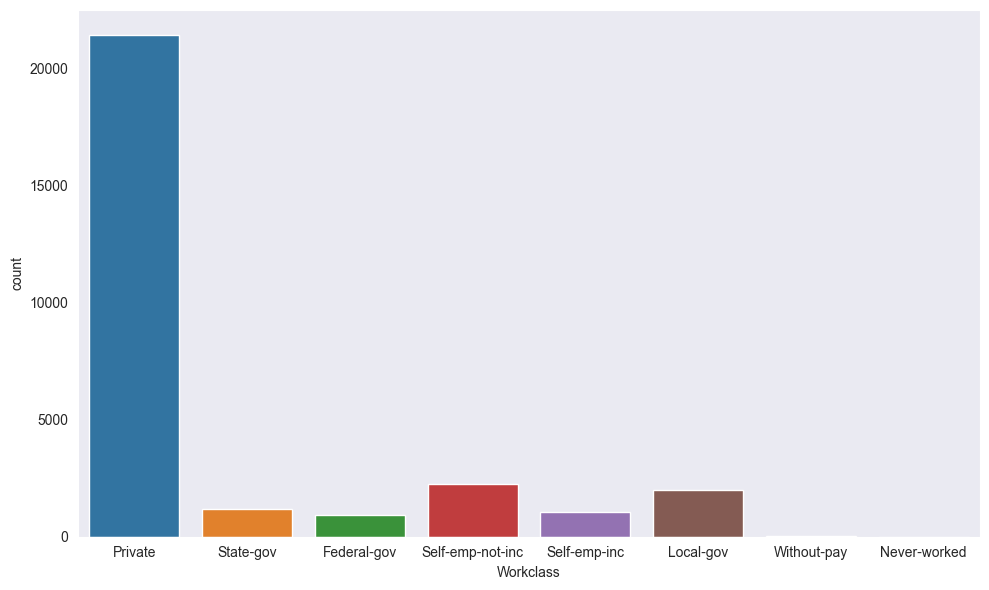

In [146]:
# Creating a plot
fig = plt.figure(figsize=(10, 6))

# Using the correct DataFrame
sns.countplot(x="Workclass", data=df)

plt.tight_layout()
plt.show()

In [147]:
df["Workclass"].value_counts()

Workclass
Private             21449
Self-emp-not-inc     2251
Local-gov            1996
State-gov            1200
Self-emp-inc         1043
Federal-gov           932
Without-pay            11
Never-worked            5
Name: count, dtype: int64

In [148]:
# Removing rows where 'Workclass' is 'Without-pay'
df = df[df["Workclass"] != "Without-pay"]

## Education

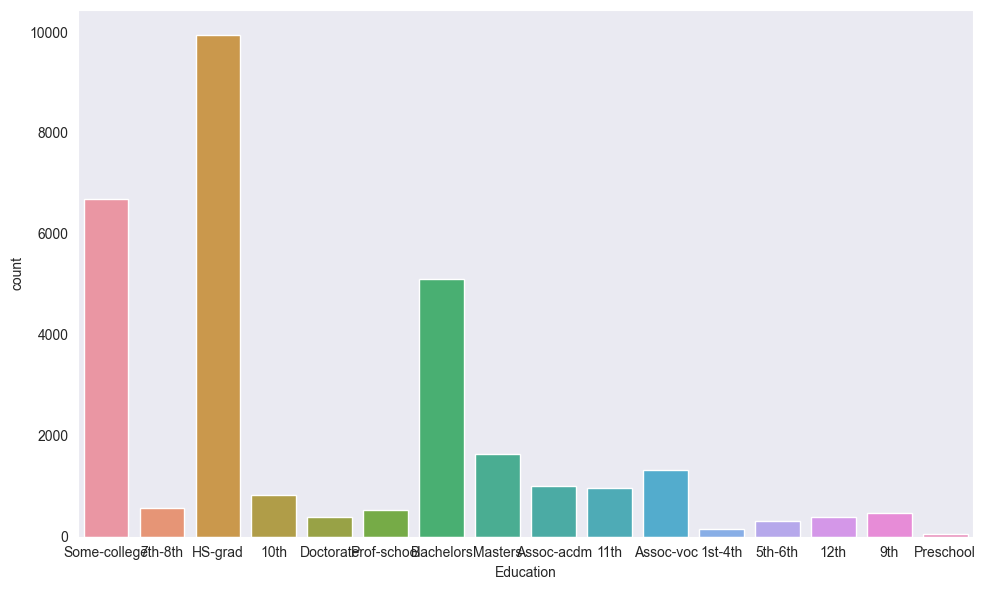

In [149]:
# Creating a plot
fig = plt.figure(figsize=(10, 6))

# Using the correct DataFrame
sns.countplot(x="Education", data=df)

plt.tight_layout()
plt.show()

In [150]:
df["Education"].replace(["11th", "9th", "7th-8th", "5th-6th", "10th", "1st-4th", "12th"], "School", inplace = True)

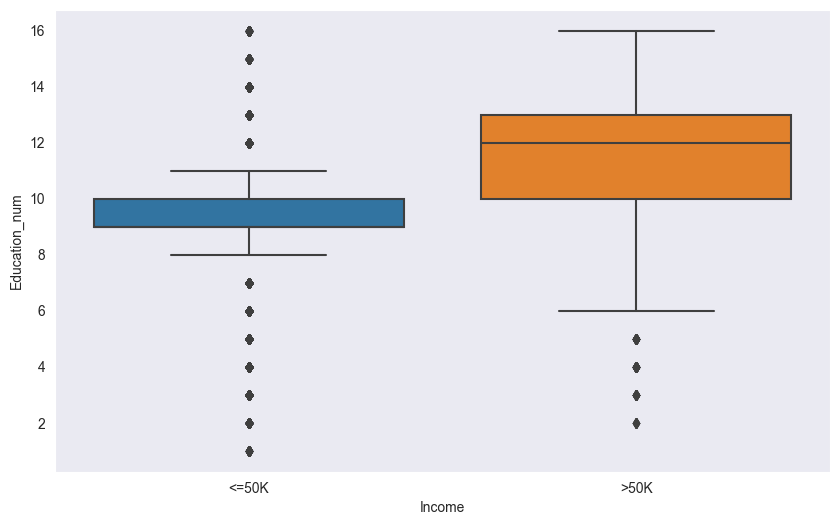

In [151]:
sns.boxplot(data=df,y="Education_num",x="Income");

## Occupation

In [152]:
df["Occupation"].value_counts()

Occupation
Craft-repair         4004
Exec-managerial      3912
Prof-specialty       3881
Adm-clerical         3548
Sales                3384
Other-service        2904
Machine-op-inspct    1962
Transport-moving     1519
Handlers-cleaners    1275
Tech-support          873
Farming-fishing       871
Protective-serv       613
Priv-house-serv       117
Armed-Forces            8
Name: count, dtype: int64

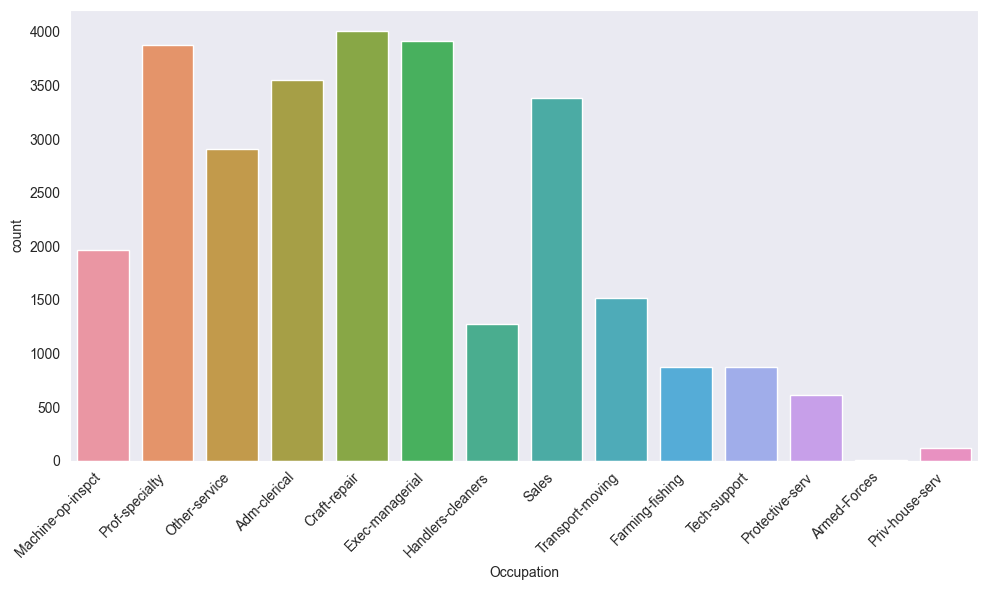

In [153]:
# Creating a plot
fig = plt.figure(figsize=(10, 6))

# Using the correct DataFrame
sns.countplot(x="Occupation", data=df)

# Rotating the x-axis labels
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Race

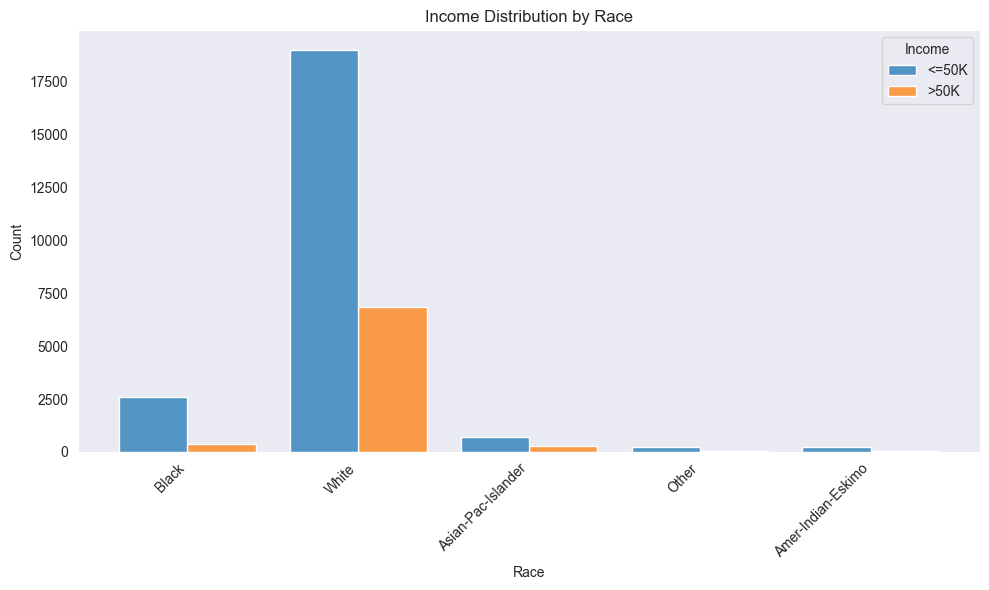

In [154]:
# Creating a plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Race", hue="Income", multiple="dodge", shrink=0.8)

# Adding a title to the plot
plt.title("Income Distribution by Race")

# Rotating the x-axis labels (if necessary)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [155]:
df["Race"].replace(["Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"],"Others", inplace = True)

## Sex

In [156]:
df["Sex"].value_counts()

Sex
Male      20567
Female     9768
Name: count, dtype: int64

Sex     Income

Female  <=50K      8647

        >50K       1121

Male    <=50K     14123

        >50K       6444

Name: Income, dtype: int64

------------------------------------------------


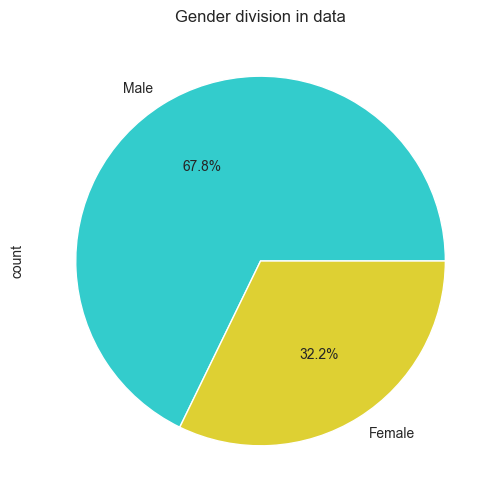

<Figure size 1000x600 with 0 Axes>

In [157]:
# Creating a DataFrame with 'Sex' and 'Income' columns
Sex_Income = pd.DataFrame({"Sex": df["Sex"], "Income": df["Income"]})

# Grouping data by 'Sex' and 'Income' and calculating the size of each group
data = Sex_Income.Income.groupby([Sex_Income.Sex, Sex_Income.Income]).size()
plt.title("Gender division in data")
print(data)
print('------------------------------------------------')

# Plotting a pie chart of the 'Sex' distribution
df["Sex"].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()

## Native Country

In [158]:
df["Native_country"].value_counts()

Native_country
United-States                 27141
Mexico                          616
Philippines                     185
Germany                         127
Canada                          113
Puerto-Rico                     108
El-Salvador                     100
India                            95
Cuba                             89
England                          83
Jamaica                          79
South                            73
China                            70
Dominican-Republic               68
Italy                            66
Guatemala                        63
Vietnam                          61
Columbia                         58
Japan                            57
Poland                           54
Taiwan                           45
Iran                             42
Haiti                            41
Portugal                         36
Nicaragua                        33
Peru                             29
France                           27
Ecuador      

In [159]:
df["Native_country"].loc[df["Native_country"] != "United-States"] = "Others"

## Fnlwgt

In [160]:
df.drop(labels = ["Fnlwgt"],axis = 1,inplace = True)

In [161]:
Categorical = [i for i in df.columns if df[i].dtypes == object]

In [162]:
#Summary of Categorial data

Categorical_summary = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'missval', '%_missval'])
temp = pd.DataFrame()

for i in Categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['missval'] = df[i].isnull().sum()
    temp['%_missval'] = (df[i].isnull().sum()/len(df))*100
    Categorical_summary = pd.concat([temp,Categorical_summary],ignore_index=True)
    
Categorical_summary

,columns,values,inc_na,exc_na,missval,%_missval
0,Income,"[<=50K, >50K]",2,2,0,0.000000
1,Native_country,"[United-States, Others]",2,2,0,0.000000
2,Sex,"[Female, Male]",2,2,0,0.000000
3,Race,"[Black, White, Others]",3,3,0,0.000000
4,Relationship,"[Unmarried, Own-child, Other-relative, Not-in-...",6,6,0,0.000000
5,Occupation,"[nan, Machine-op-inspct, Prof-specialty, Other...",15,14,1464,4.826108
6,Marital_status,"[Widowed, Divorced, Separated, Never-married, ...",5,5,0,0.000000
7,Education,"[Some-college, School, HS-grad, Doctorate, Pro...",10,10,0,0.000000
8,Workclass,"[nan, Private, State-gov, Federal-gov, Self-em...",8,7,1459,4.809626


## Checking Outliers

In [163]:
Numerical = [i for i in df.columns if df[i].dtypes != object]

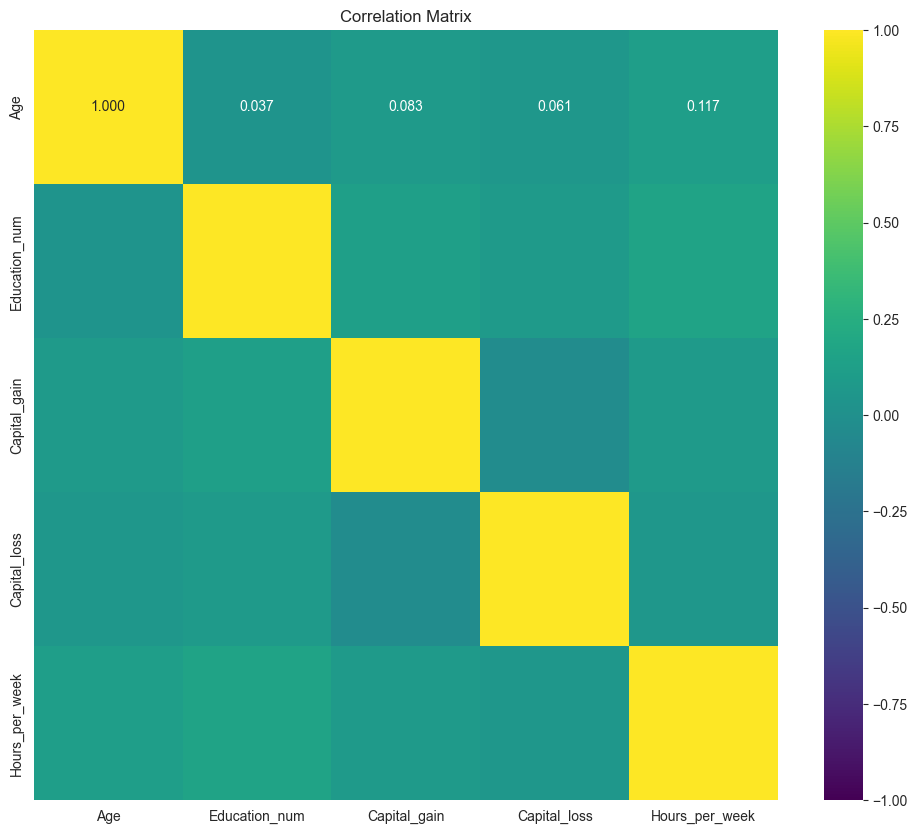

In [164]:
# Create a DataFrame from numerical columns
df_numerical = df[Numerical]

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [165]:
df.select_dtypes(include=["int64", "float64", "int32"])

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
3,66,10,0,4356,40
4,54,4,0,3900,40
5,41,10,0,3900,40
6,34,9,0,3770,45
7,38,6,0,3770,40
...,...,...,...,...,...
32557,22,10,0,0,40
32558,27,12,0,0,38
32559,40,9,0,0,40
32560,58,9,0,0,40


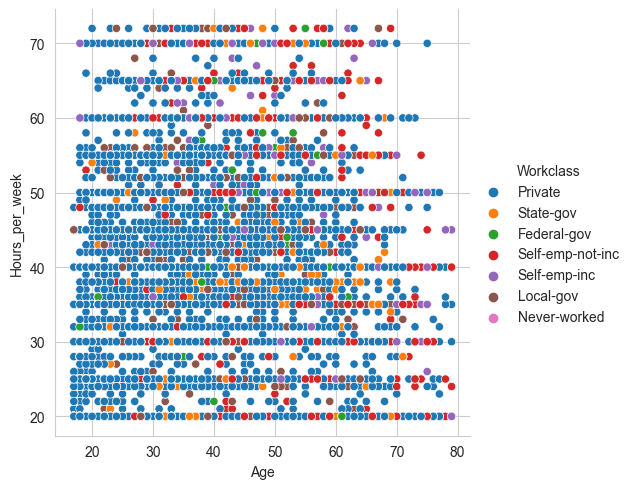

In [166]:
# Setting the style of the plot
sns.set_style("whitegrid")

# Creating a scatter plot with 'Age' on the x-axis, 'Hours_per_week' on the y-axis,
# and using 'Workclass' for color coding
sns.relplot(x="Age", y="Hours_per_week", hue="Workclass", data=df)

plt.show()

In [167]:
# Creating an empty DataFrame to store summary statistics for numerical columns
Numerical_summary = pd.DataFrame(columns=['columns', 'Min', 'Max', 'MissingVals', '%_MissingVals', 'IQR', 'lower', 'upper', 'Outlier_upper', 'Outlier_lower'])

# Creating a temporary DataFrame for intermediate calculations
temp = pd.DataFrame()

# Iterating over numerical columns
for i in Numerical:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()  # Minimum value
    temp['Max'] = df[i].max()  # Maximum value
    temp['MissingVals'] = df[i].isnull().sum()  # Number of missing values
    temp['%_MissingVals'] = df[i].isnull().sum() / len(df) * 100  # Percentage of missing values
    temp['IQR'] = df[i].quantile(0.75) - df[i].quantile(0.25)  # Interquartile range
    temp['lower'] = df[i].quantile(0.25) - 1.5 * temp['IQR']  # Lower bound for outliers
    temp['upper'] = df[i].quantile(0.75) + 1.5 * temp['IQR']  # Upper bound for outliers
    temp['Outlier_upper'] = len(df.loc[df[i] > float(temp['upper'])])  # Number of upper outliers
    temp['Outlier_lower'] = len(df.loc[df[i] < float(temp['lower'])])  # Number of lower outliers
    
    # Concatenating the temporary DataFrame with the summary DataFrame
    Numerical_summary = pd.concat([temp, Numerical_summary], ignore_index=True)
    
Numerical_summary

,columns,Min,Max,MissingVals,%_MissingVals,IQR,lower,upper,Outlier_upper,Outlier_lower
0,Hours_per_week,20,72,0,0.0,5.0,32.5,52.5,3055,3775
1,Capital_loss,0,4356,0,0.0,0.0,0.0,0.0,1435,0
2,Capital_gain,0,99999,0,0.0,0.0,0.0,0.0,2560,0
3,Education_num,1,16,0,0.0,4.0,3.0,19.0,0,198
4,Age,17,79,0,0.0,19.0,-0.5,75.5,76,0


In [168]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
3,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7,38,Private,School,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [169]:
df.dropna(inplace=True)

In [170]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# <font color='green'> <b>Data Pre-Processing</b><font color='black'>

In [171]:
from sklearn.preprocessing import OrdinalEncoder

In [172]:
# Replace 'Male' and 'Female' values in the 'female' column with 0 and 1, respectively

df.rename(columns={"Sex": "female"}, inplace=True)
df["female"].replace({"Male": 0, "Female": 1}, inplace=True)
print(df["female"].dtype)

int64


In [173]:
df["Education"].unique()

array(['School', 'Some-college', 'HS-grad', 'Doctorate', 'Prof-school',
       'Bachelors', 'Masters', 'Assoc-acdm', 'Assoc-voc', 'Preschool'],
      dtype=object)

In [174]:
# Columns to be one-hot encoded
OneHotColumns = ["Native_country", "Workclass", "Occupation", "Race", "Marital_status", "Relationship"]

# Ordinal columns with predefined order
OrdinalColumns = ["Education"]

# Ordered categories for Education
EducationOrder = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']

# There are numerical columns that need scaling
NumColumns = ["Age", "Education_num", "Sex", "Capital_gain", "Capital_loss", "Hours_per_week"]

In [175]:
df = pd.get_dummies(data=df, columns=["Native_country", "Workclass", "Occupation", "Race", "Marital_status", "Relationship"],drop_first=True)

df.head(10)

,Age,Education,Education_num,female,Capital_gain,Capital_loss,Hours_per_week,Income,Native_country_United-States,Workclass_Local-gov,...,Race_White,Marital_status_Married,Marital_status_Never-married,Marital_status_Separated,Marital_status_Widowed,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife
4,54,School,4,1,0,3900,40,<=50K,True,False,...,True,False,False,False,False,False,False,False,True,False
5,41,Some-college,10,1,0,3900,40,<=50K,True,False,...,True,False,False,True,False,False,False,True,False,False
6,34,HS-grad,9,1,0,3770,45,<=50K,True,False,...,True,False,False,False,False,False,False,False,True,False
7,38,School,6,0,0,3770,40,<=50K,True,False,...,True,False,False,True,False,False,False,False,True,False
8,74,Doctorate,16,1,0,3683,20,>50K,True,False,...,True,False,True,False,False,False,True,False,False,False
9,68,HS-grad,9,1,0,3683,40,<=50K,True,False,...,True,False,False,False,False,True,False,False,False,False
10,41,Some-college,10,0,0,3004,60,>50K,False,False,...,True,False,True,False,False,False,False,False,True,False
11,45,Doctorate,16,1,0,3004,35,>50K,True,False,...,False,False,False,False,False,False,False,False,True,False
12,38,Prof-school,15,0,0,2824,45,>50K,True,False,...,True,False,True,False,False,True,False,False,False,False
13,52,Bachelors,13,1,0,2824,20,>50K,True,False,...,True,False,False,False,True,True,False,False,False,False


In [176]:
# Finding Boolean columns
bool_cols = df.select_dtypes(include=[bool]).columns

# Converting Boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)

# Displaying the first 10 rows of the DataFrame
df.head(10)

,Age,Education,Education_num,female,Capital_gain,Capital_loss,Hours_per_week,Income,Native_country_United-States,Workclass_Local-gov,...,Race_White,Marital_status_Married,Marital_status_Never-married,Marital_status_Separated,Marital_status_Widowed,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife
4,54,School,4,1,0,3900,40,<=50K,1,0,...,1,0,0,0,0,0,0,0,1,0
5,41,Some-college,10,1,0,3900,40,<=50K,1,0,...,1,0,0,1,0,0,0,1,0,0
6,34,HS-grad,9,1,0,3770,45,<=50K,1,0,...,1,0,0,0,0,0,0,0,1,0
7,38,School,6,0,0,3770,40,<=50K,1,0,...,1,0,0,1,0,0,0,0,1,0
8,74,Doctorate,16,1,0,3683,20,>50K,1,0,...,1,0,1,0,0,0,1,0,0,0
9,68,HS-grad,9,1,0,3683,40,<=50K,1,0,...,1,0,0,0,0,1,0,0,0,0
10,41,Some-college,10,0,0,3004,60,>50K,0,0,...,1,0,1,0,0,0,0,0,1,0
11,45,Doctorate,16,1,0,3004,35,>50K,1,0,...,0,0,0,0,0,0,0,0,1,0
12,38,Prof-school,15,0,0,2824,45,>50K,1,0,...,1,0,1,0,0,1,0,0,0,0
13,52,Bachelors,13,1,0,2824,20,>50K,1,0,...,1,0,0,0,1,1,0,0,0,0


In [177]:
# Create and fit an OrdinalEncoder with ordered categories

encoder = OrdinalEncoder(categories=[EducationOrder])

In [178]:
# Fit and transform the encoder on the training data and create a new column with encoded values
df['Education_encoded'] = encoder.fit_transform(df[['Education']])

In [179]:
# Drop the 'Education' column
df = df.drop(columns=['Education'])

In [180]:
# Convert the values in the 'Income' column to numerical values
df['Income'] = df['Income'].replace({'<=50K': 1, '>50K': 0})

# Check the transformation
print(df['Income'].head(10))

4     1

5     1

6     1

7     1

8     0

9     1

10    0

11    0

12    0

13    0

Name: Income, dtype: int64


In [181]:
df.select_dtypes(exclude=['int'])

,Education_encoded
4,1.0
5,3.0
6,2.0
7,1.0
8,9.0
...,...
32557,3.0
32558,5.0
32559,2.0
32560,2.0


# <font color='green'> <b>Implement Logistic Regression</b><font color='black'>

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [183]:
# Prepare data
X = df.drop(["Income"], axis=1)
y = df["Income"]

In [184]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [185]:
# Define the pipeline with standard scaling and logistic regression
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
log_pipe = Pipeline(steps=operations)

In [186]:
# Fit the model on the training data
log_pipe.fit(X_train, y_train)# Make predictions on the test set
y_pred = log_pipe.predict(X_test)
print(y_pred)  # Display predictions

[0 1 1 ... 0 0 1]


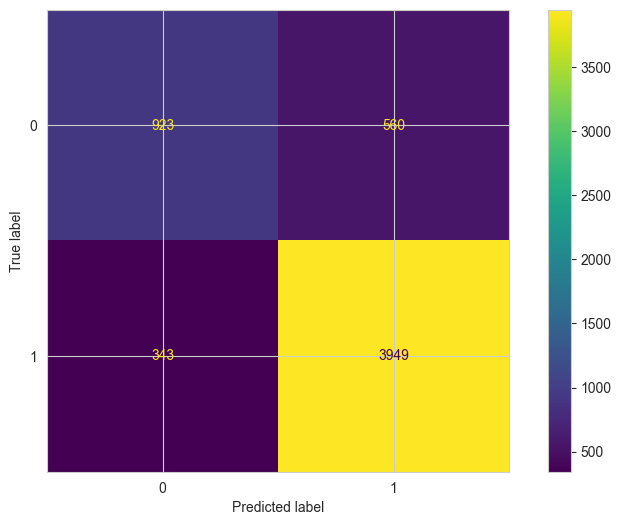

In [187]:
# Display confusion matrix for the test set
ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test)

In [188]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    """
    Function to evaluate the model using confusion matrix and classification report
    for both training and test sets.
    """
    # Make predictions for both training and test sets
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    # Display confusion matrix and classification report for the test set
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    # Display confusion matrix and classification report for the training set
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [189]:
# Evaluate the model
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set

[[ 923  560]

 [ 343 3949]]

              precision    recall  f1-score   support



           0       0.73      0.62      0.67      1483

           1       0.88      0.92      0.90      4292



    accuracy                           0.84      5775

   macro avg       0.80      0.77      0.78      5775

weighted avg       0.84      0.84      0.84      5775





Train_Set

[[ 3629  2300]

 [ 1284 15883]]

              precision    recall  f1-score   support



           0       0.74      0.61      0.67      5929

           1       0.87      0.93      0.90     17167



    accuracy                           0.84     23096

   macro avg       0.81      0.77      0.78     23096

weighted avg       0.84      0.84      0.84     23096




## Grid Search CV

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic__penalty': ['l1', 'l2']         # Penalty type
}

In [192]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=log_pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [193]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}

Best cross-validation score: 0.84


In [194]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)
print(y_pred)  # Display predictions

[0 1 1 ... 0 0 1]


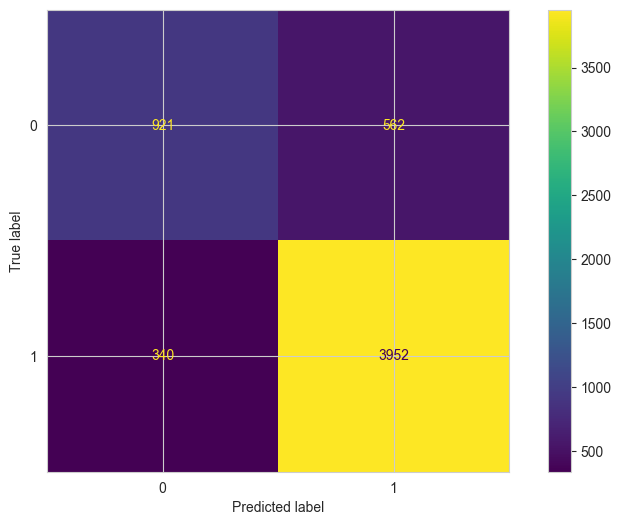

In [195]:
# Display confusion matrix for the test set
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [196]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(best_model, X_train, y_train, X_test, y_test):
    """
    Function to evaluate the model using confusion matrix and classification report
    for both training and test sets.
    """

In [197]:
 # Make predictions for both training and test sets
y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
print("Test_Set")

Test_Set


In [198]:
# Display confusion matrix and classification report for the test set
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display confusion matrix and classification report for the training set
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Test_Set

[[ 921  562]

 [ 340 3952]]

              precision    recall  f1-score   support



           0       0.73      0.62      0.67      1483

           1       0.88      0.92      0.90      4292



    accuracy                           0.84      5775

   macro avg       0.80      0.77      0.78      5775

weighted avg       0.84      0.84      0.84      5775



Train_Set

[[ 3626  2303]

 [ 1280 15887]]

              precision    recall  f1-score   support



           0       0.74      0.61      0.67      5929

           1       0.87      0.93      0.90     17167



    accuracy                           0.84     23096

   macro avg       0.81      0.77      0.78     23096

weighted avg       0.84      0.84      0.84     23096




## ROC (Receiver Operating Curve) and AUC (Area Under Curve)


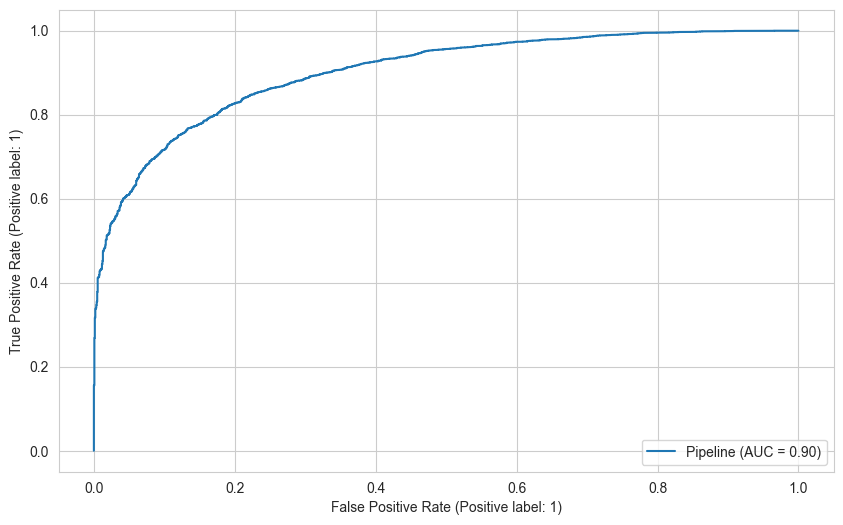

In [199]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, X_test, y_test)

# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(grid_model, X_test, y_test); 

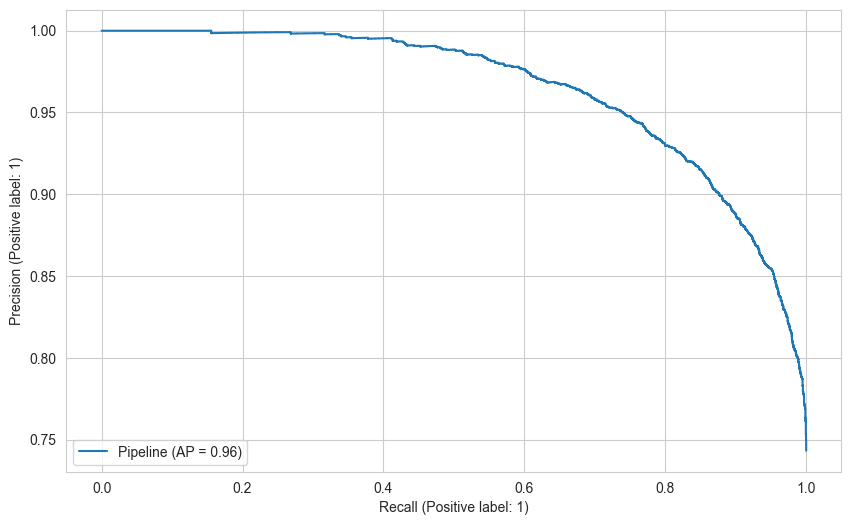

In [200]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)

# dengeli data setlerinde hem AUC score hem de Average precision score birbirlerine yakın değerler döndürse de
# dengeli data setleri için AUC, dengesiz veri setleri için average precision scorlarını kullanmayı alışkanlık haline getirelim

# plot_precision_recall_curve(grid_model, X_test, y_test);

# <font color='green'> <b>K Nearest Neigbors (KNN)</b><font color='black'>

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [202]:
# Define the pipeline for KNN
knn_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

In [203]:
# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'knn__p': [1, 2]                       # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [204]:
# Setup GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn_pipe, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best parameters and best score for KNN
print("Best parameters for KNN: ", grid_search_knn.best_params_)
print("Best cross-validation score for KNN: {:.2f}".format(grid_search_knn.best_score_))

Best parameters for KNN:  {'knn__n_neighbors': 11, 'knn__p': 1}

Best cross-validation score for KNN: 0.83


KNN Test Set Evaluation

[[ 889  594]

 [ 413 3879]]

              precision    recall  f1-score   support



           0       0.68      0.60      0.64      1483

           1       0.87      0.90      0.89      4292



    accuracy                           0.83      5775

   macro avg       0.77      0.75      0.76      5775

weighted avg       0.82      0.83      0.82      5775




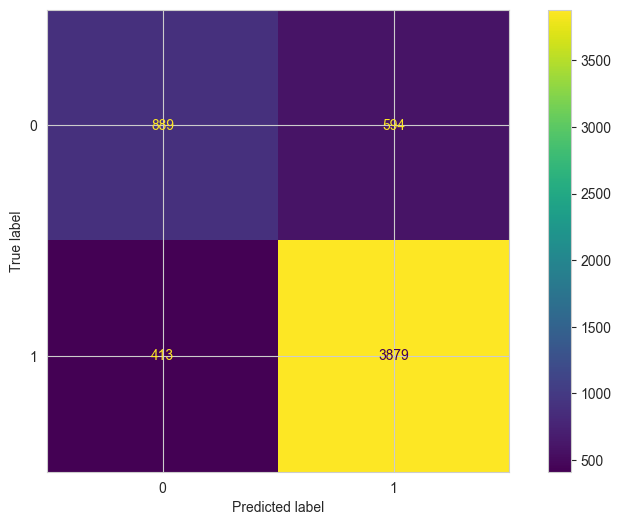

In [205]:
# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate KNN on the test set
y_pred_knn = best_knn_model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test, y_test)
print("KNN Test Set Evaluation")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

## Evaluating ROC Curves and AUC

In [206]:
from sklearn.metrics import roc_curve, auc

In [207]:
# ROC Curve and AUC Calculation for the best KNN model
y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

In [208]:
# Compute predicted probabilities
y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Compute AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Print AUC
print(f"KNN Model AUC: {roc_auc_knn:.2f}")

KNN Model AUC: 0.87


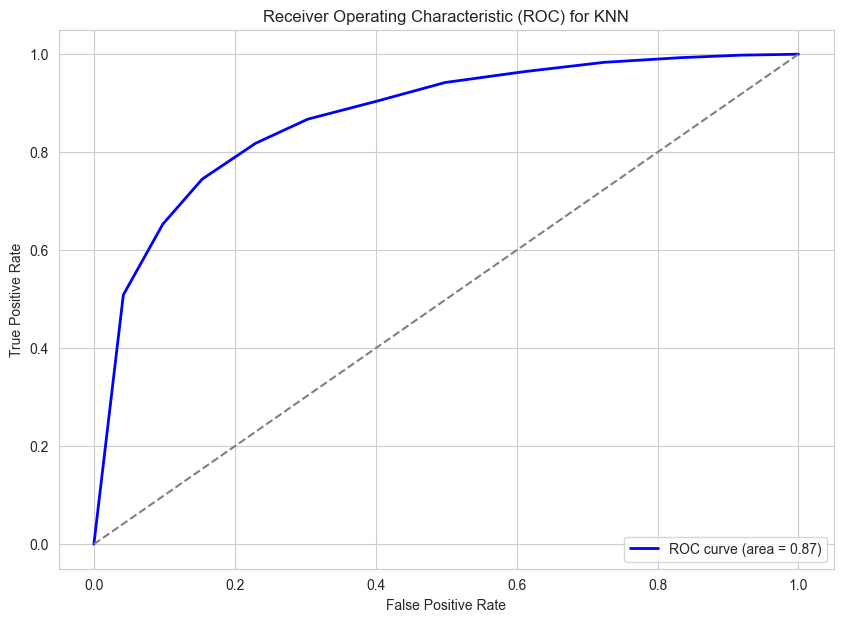

In [209]:
# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc='lower right')
plt.show()

In [210]:
# Plot error rates for different k values to visualize performance
test_error_rates = []
train_error_rates = []

for k in range(1, 10):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train, y_train)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=['recall'], cv=5, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 
    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

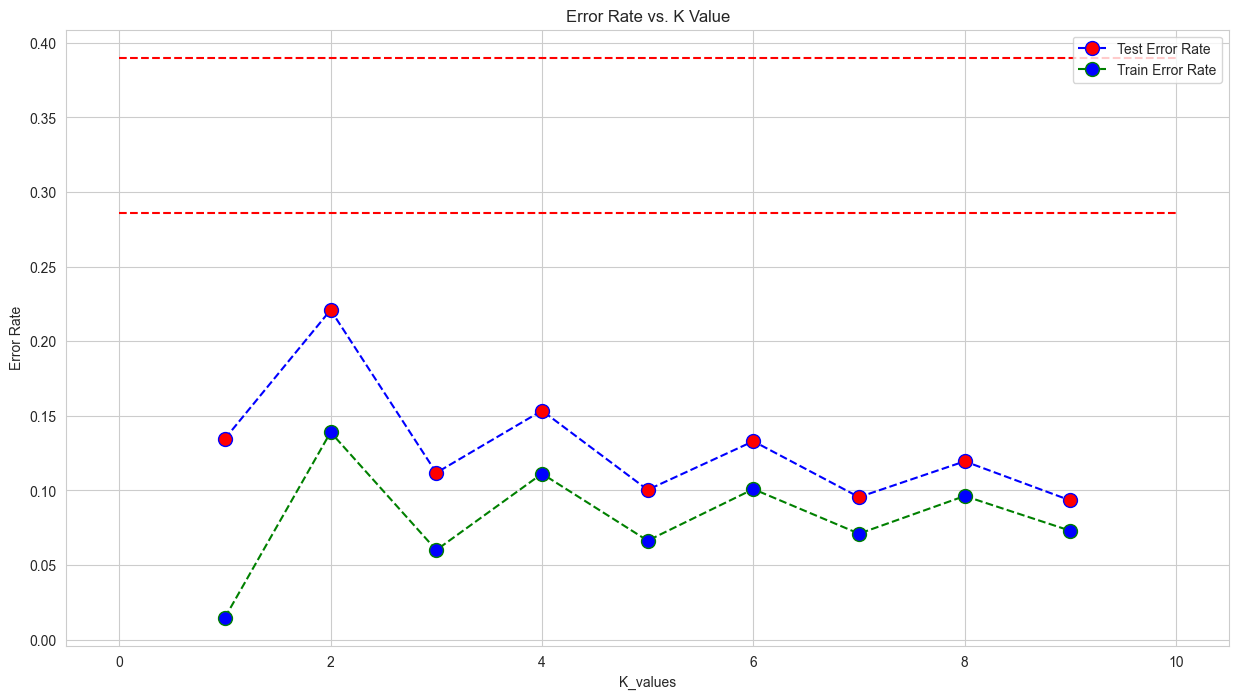

In [211]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10), test_error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10, label='Test Error Rate')
plt.plot(range(1, 10), train_error_rates, color='green', linestyle='--', marker='o', markerfacecolor='blue', markersize=10, label='Train Error Rate')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin=0, xmax=10, colors='r', linestyles="--")
plt.hlines(y=0.286, xmin=0, xmax=10, colors='r', linestyles="--")
plt.legend()
plt.show()

## Cross Validate For Optimal K Value

In [212]:
# Define the pipeline for KNN with n_neighbors=8
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=8))]
knn8_model = Pipeline(steps=operations)

# Perform cross-validation
scores = cross_validate(knn8_model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10, return_train_score=True)

# Convert scores to DataFrame for better readability
df_scores = pd.DataFrame(scores)

# Display the DataFrame with cross-validation scores
print("Cross-validation scores:")
print(df_scores)

Cross-validation scores:

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \

0  0.014151    0.115397       0.811255        0.857308        0.879218   

1  0.010595    0.109686       0.825108        0.859377        0.881021   

2  0.011540    0.107127       0.826840        0.857837        0.881297   

3  0.013267    0.107367       0.822511        0.858847        0.883284   

4  0.010537    0.105728       0.816883        0.856298        0.879250   

5  0.012110    0.108054       0.817749        0.856779        0.877622   

6  0.008550    0.113223       0.823733        0.857122        0.886659   

7  0.011613    0.107895       0.832395        0.857170        0.882116   

8  0.011601    0.105938       0.826332        0.855102        0.878091   

9  0.011597    0.108426       0.826332        0.859335        0.875500   



   train_precision  test_recall  train_recall   test_f1  train_f1  

0         0.905009     0.864881      0.902783  0.871991  0.903895  

1        

In [213]:
# Fit the model with the whole training data
knn8_model.fit(X_train, y_train)
print('\nWITH K=8\n')



WITH K=8




In [214]:
# Define the eval_metric function
def eval_metric(knn8_model, X_train, y_train, X_test, y_test):
    """
    Evaluates the model using confusion matrix and classification report for both training and test sets.
    """
    # Make predictions for both training and test sets
    y_train_pred = knn8_model.predict(X_train)
    y_pred = knn8_model.predict(X_test)

    print("Test Set")
    # Display confusion matrix and classification report for the test set
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print()
    print("Train Set")
    # Display confusion matrix and classification report for the training set
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Evaluate the model
eval_metric(knn8_model, X_train, y_train, X_test, y_test)

Test Set

[[1006  477]

 [ 541 3751]]

              precision    recall  f1-score   support



           0       0.65      0.68      0.66      1483

           1       0.89      0.87      0.88      4292



    accuracy                           0.82      5775

   macro avg       0.77      0.78      0.77      5775

weighted avg       0.83      0.82      0.82      5775





Train Set

[[ 4270  1659]

 [ 1625 15542]]

              precision    recall  f1-score   support



           0       0.72      0.72      0.72      5929

           1       0.90      0.91      0.90     17167



    accuracy                           0.86     23096

   macro avg       0.81      0.81      0.81     23096

weighted avg       0.86      0.86      0.86     23096




In [215]:
# Compute the mean scores for each metric
mean_scores = df_scores.mean()
print(mean_scores[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']])

test_accuracy     0.822914

test_precision    0.880406

test_recall       0.881519

test_f1           0.880933

dtype: float64


# <font color='green'> <b>Implement Support Vector Machine (SVC)</b><font color='black'>

In [216]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [217]:
# Define the pipeline for SVM
operations = [("scaler", MinMaxScaler()), ("svc", SVC())]
svm_pipe_model = Pipeline(steps=operations)

In [218]:
# Fit the model on the training data
svm_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [219]:
# Evaluate the model
eval_metric(svm_pipe_model, X_train, y_train, X_test, y_test)

Test Set

[[ 843  640]

 [ 311 3981]]

              precision    recall  f1-score   support



           0       0.73      0.57      0.64      1483

           1       0.86      0.93      0.89      4292



    accuracy                           0.84      5775

   macro avg       0.80      0.75      0.77      5775

weighted avg       0.83      0.84      0.83      5775





Train Set

[[ 3323  2606]

 [ 1160 16007]]

              precision    recall  f1-score   support



           0       0.74      0.56      0.64      5929

           1       0.86      0.93      0.89     17167



    accuracy                           0.84     23096

   macro avg       0.80      0.75      0.77     23096

weighted avg       0.83      0.84      0.83     23096




In [220]:
# Perform cross-validation
scores = cross_validate(svm_pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

# Convert scores to DataFrame for better readability
df_scores = pd.DataFrame(scores)

# Display the DataFrame with cross-validation scores
print(df_scores)

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \

0  6.237269    0.989734       0.828139        0.837246        0.859869   

1  5.981911    0.985919       0.838961        0.836188        0.864499   

2  5.949545    0.981772       0.831602        0.836476        0.856989   

3  5.813942    0.966525       0.830736        0.836380        0.858378   

4  6.329355    0.975794       0.828139        0.835947        0.853319   

5  5.762399    0.954103       0.828571        0.836958        0.854155   

6  5.858280    0.952755       0.827198        0.836869        0.850159   

7  5.890245    0.972982       0.845821        0.835185        0.867568   

8  5.852564    0.959246       0.837592        0.836677        0.857982   

9  5.907400    0.982873       0.822867        0.836725        0.842685   



   train_precision  test_recall  train_recall   test_f1  train_f1  

0         0.859201     0.918462      0.934110  0.888201  0.895091  

1         0.859188     0.928946    

In [221]:
# Compute the mean scores for each metric
mean_scores = df_scores.mean()
print(mean_scores[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']])

test_accuracy     0.831962

test_precision    0.856560

test_recall       0.929692

test_f1           0.891603

dtype: float64


## GridSearch

In [222]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

In [223]:
# Create a pipeline with scaling and SVM model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the data
    ('svc', SVC())  # Add SVM model to the pipeline (note the name 'svc')
])

In [224]:
# Define the parameter grid for Grid Search
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}

In [225]:
# Set up the Grid Search
best_svm_model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

In [226]:
# Train the model
best_svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [227]:
eval_metric(best_svm_model, X_train, y_train, X_test, y_test)

Test Set

[[ 897  586]

 [ 295 3997]]

              precision    recall  f1-score   support



           0       0.75      0.60      0.67      1483

           1       0.87      0.93      0.90      4292



    accuracy                           0.85      5775

   macro avg       0.81      0.77      0.79      5775

weighted avg       0.84      0.85      0.84      5775





Train Set

[[ 3582  2347]

 [ 1092 16075]]

              precision    recall  f1-score   support



           0       0.77      0.60      0.68      5929

           1       0.87      0.94      0.90     17167



    accuracy                           0.85     23096

   macro avg       0.82      0.77      0.79     23096

weighted avg       0.85      0.85      0.84     23096




In [228]:
# Get the best model from Grid Search
best_svm_model = grid_search.best_estimator_

# Predict the test set results
y_pred = best_svm_model.predict(X_test)

# Print accuracy score and classification report
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

**** ACCURACY_SCORE **** 



 0.8438095238095238 



**** CLASSIFICATION_REPORT **** 



               precision    recall  f1-score   support



           0       0.73      0.62      0.67      1483

           1       0.88      0.92      0.90      4292



    accuracy                           0.84      5775

   macro avg       0.80      0.77      0.78      5775

weighted avg       0.84      0.84      0.84      5775

 




In [229]:
# Generate and print the confusion matrix
print('**** CONFUSION MATRIX ****')
cm = confusion_matrix(y_test, y_pred)

**** CONFUSION MATRIX ****


In [230]:
# Display the confusion matrix as text
for row in cm:
    print('\t'.join(map(str, row)))

921	562

340	3952


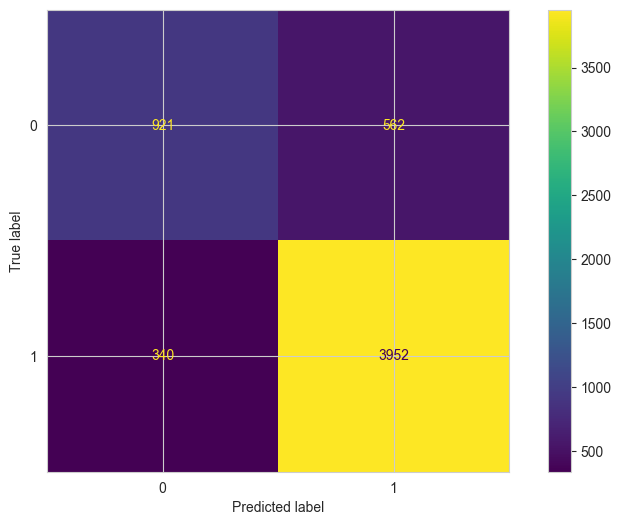

In [231]:
# Display the confusion matrix as a heatmap
ConfusionMatrixDisplay.from_estimator(best_svm_model, X_test, y_test)

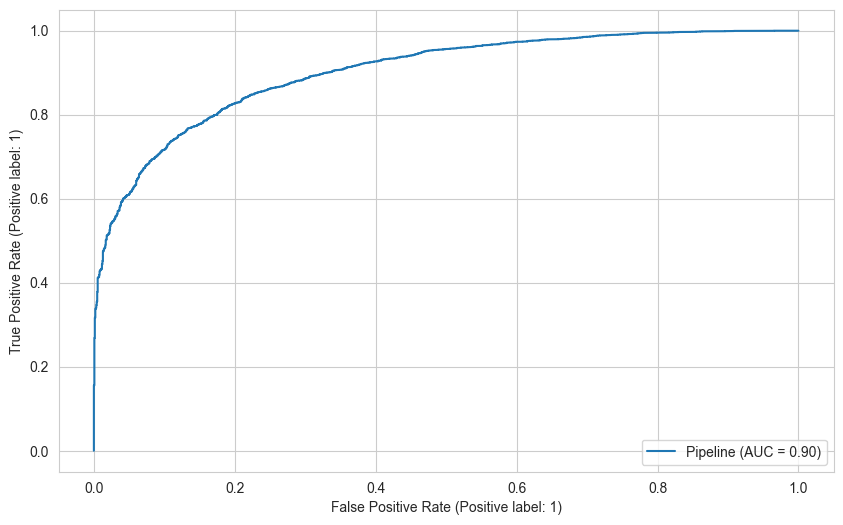

In [232]:
# Display ROC curve
RocCurveDisplay.from_estimator(best_svm_model, X_test, y_test)

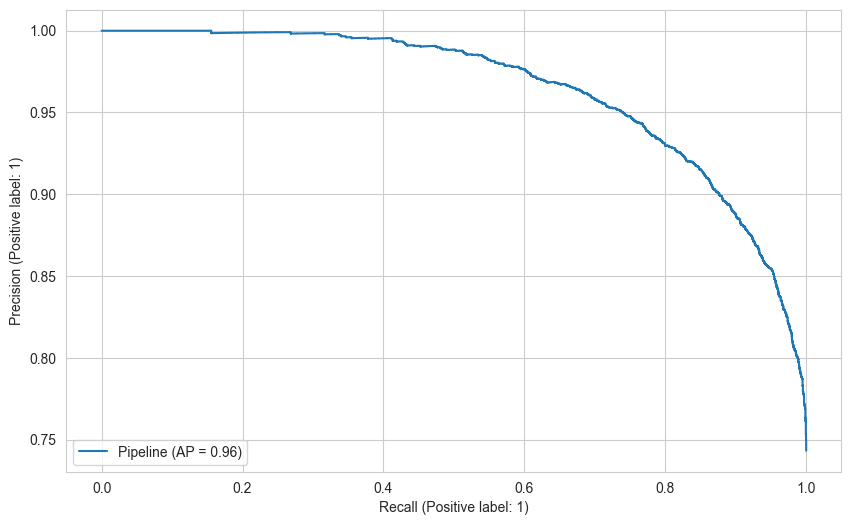

In [233]:
# Display Precision-Recall curve
PrecisionRecallDisplay.from_estimator(best_svm_model, X_test, y_test)

In [234]:
# Perform cross-validation and compute scores
scores = cross_validate(best_svm_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

# Convert scores to DataFrame for better readability
df_scores = pd.DataFrame(scores)
print(df_scores)

   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \

0  0.045657    0.000000       0.838528        0.845569        0.873333   

1  0.041464    0.009003       0.846320        0.844896        0.874587   

2  0.040256    0.005022       0.846320        0.845040        0.875828   

3  0.039253    0.008132       0.837229        0.846098        0.869015   

4  0.039992    0.009990       0.850216        0.844751        0.878939   

5  0.034635    0.010335       0.844156        0.845136        0.871374   

6  0.043520    0.006505       0.836293        0.845769        0.866849   

7  0.049971    0.000000       0.854049        0.843652        0.879890   

8  0.039974    0.000000       0.842356        0.844903        0.872657   

9  0.043530    0.006003       0.847986        0.844855        0.869919   



   train_precision  test_recall  train_recall   test_f1  train_f1  

0         0.873535     0.915550      0.926343  0.893944  0.899164  

1         0.873199     0.926034    

In [235]:
# Compute the mean scores for each metric
mean_scores = df_scores.mean()
print(mean_scores[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']])

test_accuracy     0.844345

test_precision    0.873239

test_recall       0.924857

test_f1           0.898298

dtype: float64


# <font color='green'> <b>Conclusion</b><font color='black'>

## Logistic Model

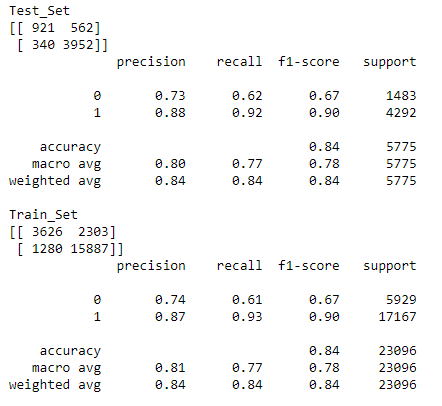

## KNN Model

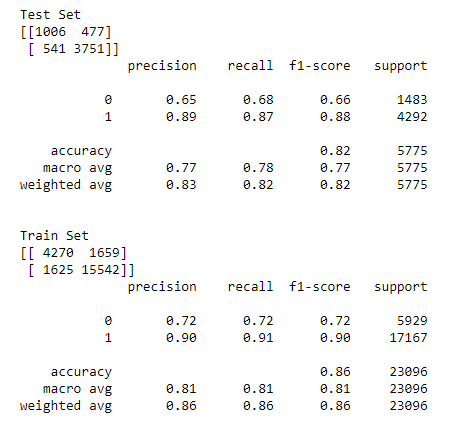

## SVM Model

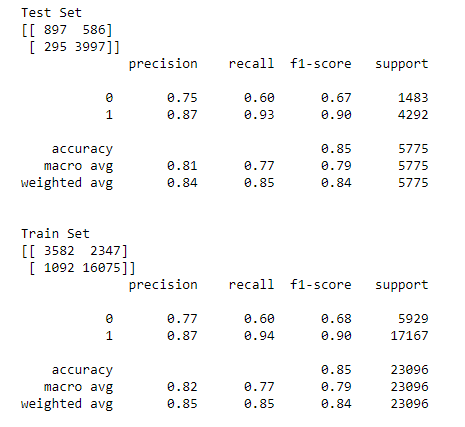

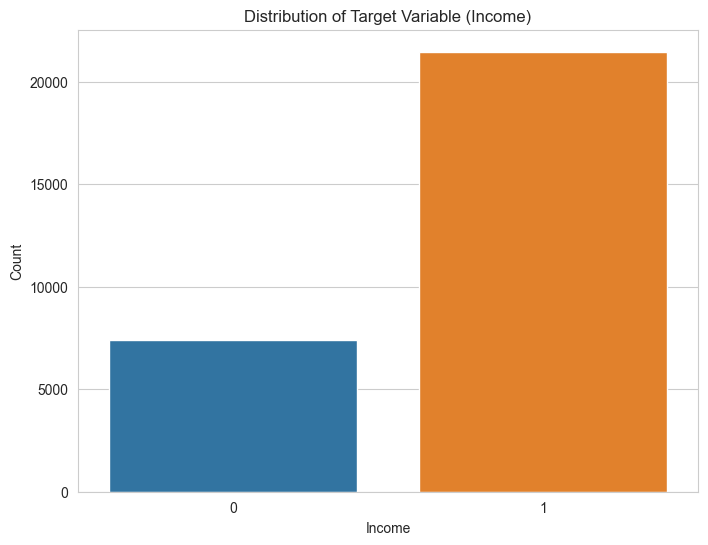

In [236]:
# Assume 'income' is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=df)  # df is your DataFrame
plt.title('Distribution of Target Variable (Income)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()